# Logistic Regression: Classification of Handwritten Digits

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

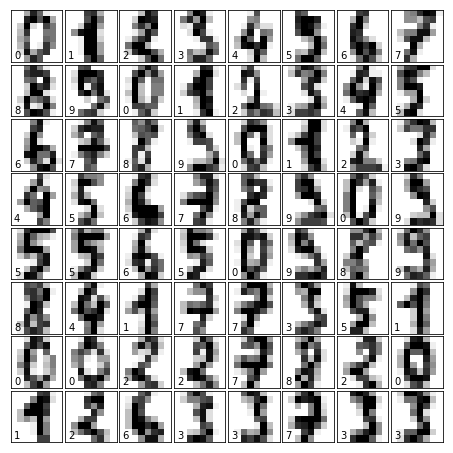

In [2]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Logistic Regression

In [3]:
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

''' build your LR model here and please specify the value of C and try 'multinomial' classifier with 'sag' solver '''
# train the model
clf = LogisticRegression(C=1e-2,multi_class="ovr",solver='liblinear')


# fit on the training dataset
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

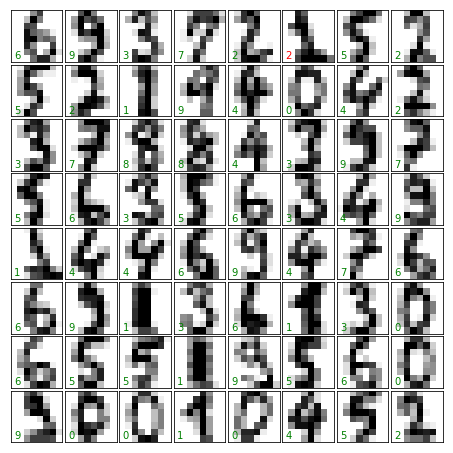

In [5]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

# Quantitative Measurement on the Performance

In [6]:
matches = (predicted == expected)
print('accuracy:%.3f'%(matches.sum() / float(len(matches))))

accuracy:0.964


In [7]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.95      0.95      0.95        37
          2       0.95      1.00      0.97        38
          3       1.00      0.93      0.97        46
          4       1.00      0.98      0.99        55
          5       0.93      0.95      0.94        59
          6       0.98      0.98      0.98        45
          7       1.00      0.98      0.99        41
          8       0.90      0.95      0.92        38
          9       0.94      0.94      0.94        48

avg / total       0.97      0.96      0.96       450



In [8]:
print(metrics.confusion_matrix(expected, predicted))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  2  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  2]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  2 45]]


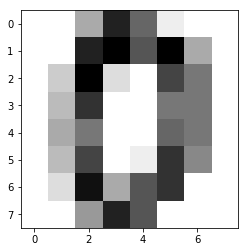

In [9]:
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')

In [10]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])